# Library 

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
import numpy as np

# 제어용 변수 설정

train_path => train.json의 위치를 입력해준다.
Dataset_scale => dataset의 이미지 크기로 조절, 1024,1024 = 1, 512,512 = 2

In [1]:
train_path = "./train.json"
Dataset_scale = 1 #

# 실행 부분

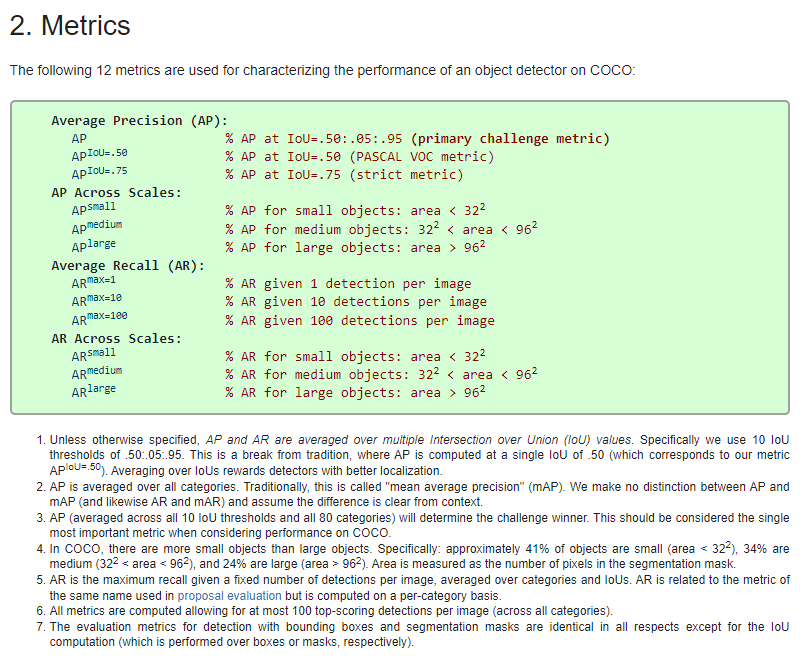

Reference : https://cocodataset.org/#detection-eval

# Data 불러오기

In [2]:
train_json = json.load(open(train_path,'r'))
print(train_json["images"][1])
print(train_json["annotations"][1])
id_list = []
size_list = ['small','medium','large']
for cate in train_json['categories']:
    id_list.append(cate['name'])
print(id_list)

{'width': 1024, 'height': 1024, 'file_name': 'train/0001.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2021-01-10 16:30:39', 'id': 1}
{'image_id': 1, 'category_id': 3, 'area': 10402.56, 'bbox': [0.0, 407.4, 57.6, 180.6], 'iscrowd': 0, 'id': 1}
['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [3]:
EDA_matrix = [[0 for x in range(len(size_list))] for y in range(len(id_list))]
percent_matrix = [[0 for x in range(len(size_list))] for y in range(len(id_list))]
for i in range(len(train_json["annotations"])):
    c_id=train_json["annotations"][i]['category_id']
    area=train_json["annotations"][i]['area']
    if area >= (Dataset_scale*96)**2:
        EDA_matrix[c_id][2] += 1
    elif area >= (Dataset_scale*32)**2:
        EDA_matrix[c_id][1] += 1
    else:
        EDA_matrix[c_id][0] += 1
for i in range(len(percent_matrix)):
    total = sum(EDA_matrix[i])
    for j in range(len(percent_matrix[i])):
        percent_matrix[i][j] = round(EDA_matrix[i][j]*100/total,2)

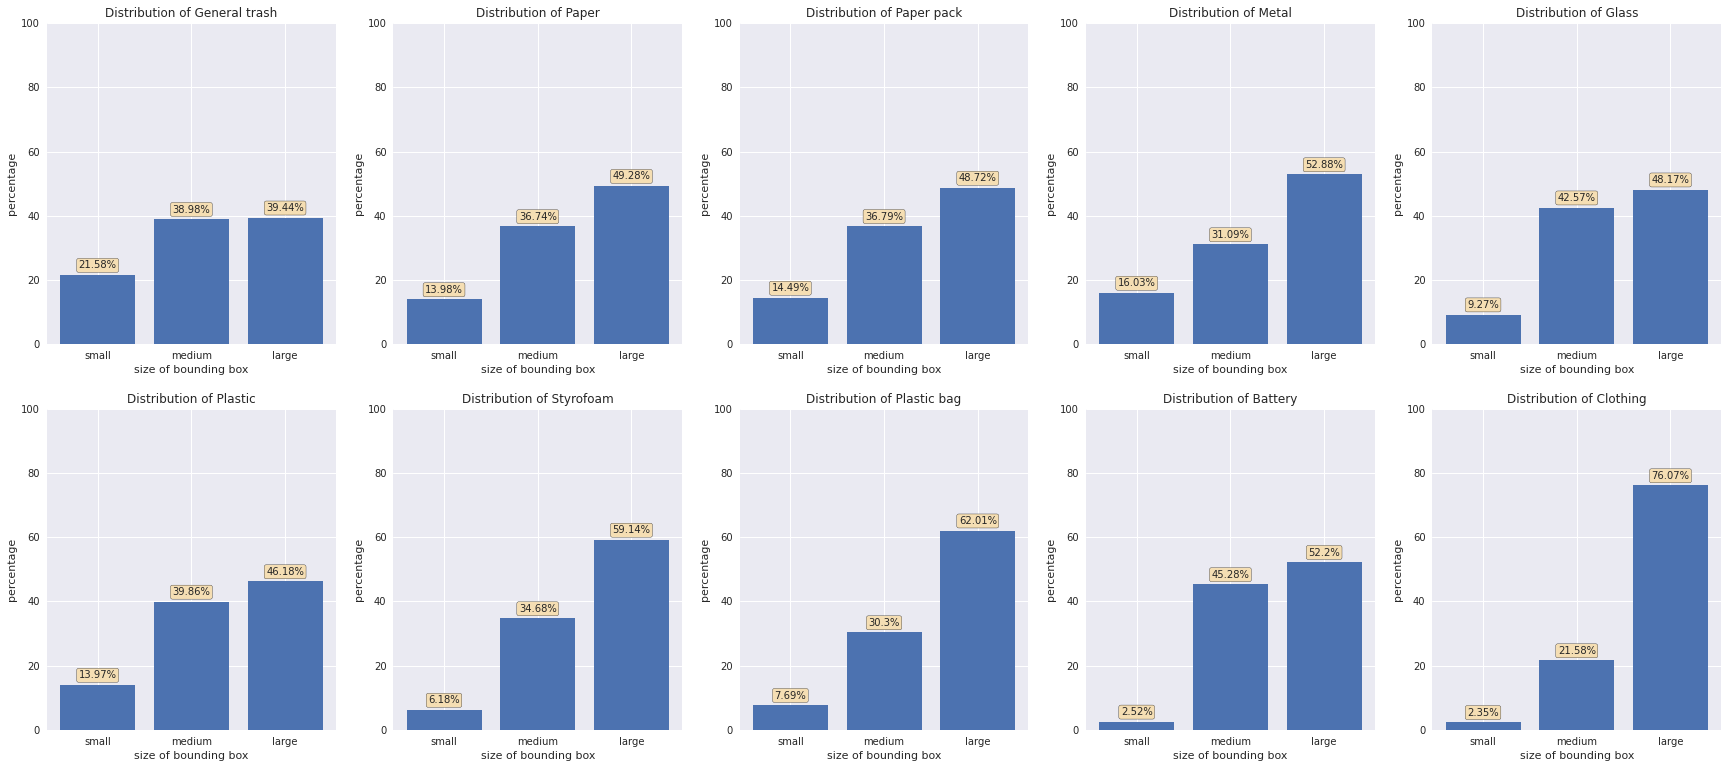

In [13]:
fig, ax = plt.subplots(2,5,figsize=(30,13))
for y in range(len(ax)):
    for x in range(len(ax[y])):
        ax[y][x].bar(size_list,percent_matrix[y*5+x])
        ax[y][x].set_xlabel('size of bounding box')
        ax[y][x].set_ylabel('percentage')
        ax[y][x].set_title("Distribution of "+id_list[y*5+x])
        ax[y][x].set_ylim(0,100)
        bbox = dict(boxstyle='round',fc='wheat',pad=0.2) #bbox 선언
        for k in range(len(size_list)):
            ax[y][x].text(x=size_list[k],y=percent_matrix[y*5+x][k]+3,s=f'{percent_matrix[y*5+x][k]}%',va='center',ha='center',bbox=bbox,zorder=9)
plt.show()
fig.savefig('Distribution of each class compared with the size of bounding box.png', dpi=100)

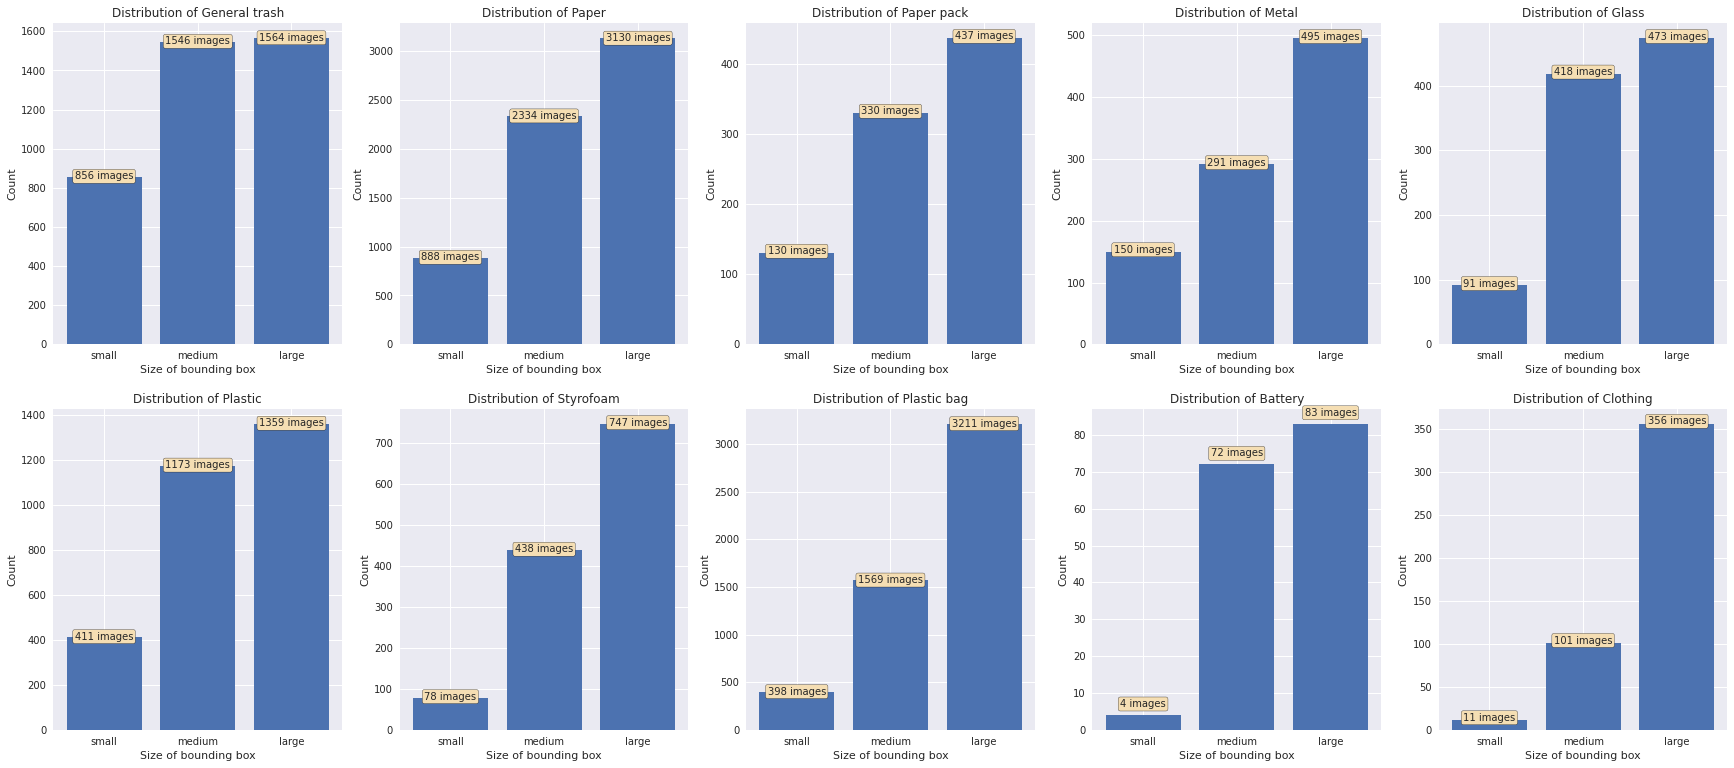

In [5]:
fig, ax = plt.subplots(2,5,figsize=(30,13))
for y in range(len(ax)):
    for x in range(len(ax[y])):
        ax[y][x].bar(size_list,EDA_matrix[y*5+x])
        ax[y][x].set_xlabel('Size of bounding box')
        ax[y][x].set_ylabel('Count')
        ax[y][x].set_title("Distribution of "+id_list[y*5+x])
        bbox = dict(boxstyle='round',fc='wheat',pad=0.2) #bbox 선언
        for k in range(len(size_list)):
            ax[y][x].text(x=size_list[k],y=EDA_matrix[y*5+x][k]+3,s=f'{EDA_matrix[y*5+x][k]} images',va='center',ha='center',bbox=bbox,zorder=9)
plt.show()
fig.savefig('Number of each class compared with the size of bounding box.png', dpi=100)

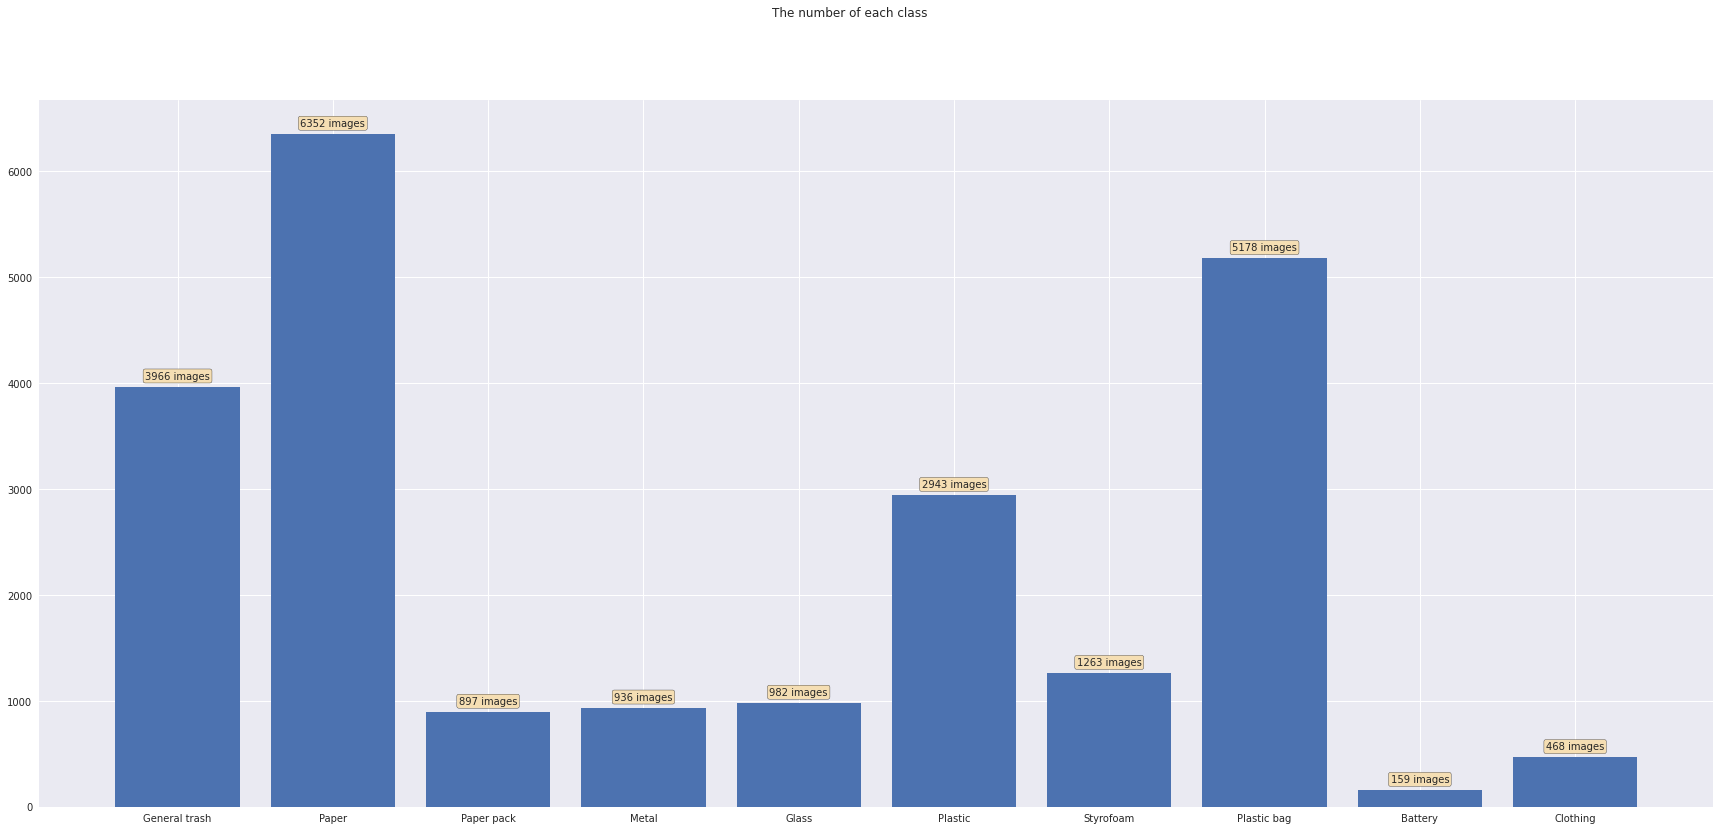

In [6]:
sum_EDA = [sum(EDA_matrix[i]) for i in range(len(id_list))]
fig, ax = plt.subplots(1,1,figsize=(30,13))
ax.bar(id_list, sum_EDA)
bbox = dict(boxstyle='round',fc='wheat',pad=0.2) #bbox 선언
for k in range(len(id_list)):
    ax.text(x=id_list[k],y=sum_EDA[k]+100,s=f'{sum_EDA[k]} images',va='center',ha='center',bbox=bbox,zorder=9)
fig.suptitle('The number of each class')
plt.show()
fig.savefig('The number of each class.png', dpi=100)

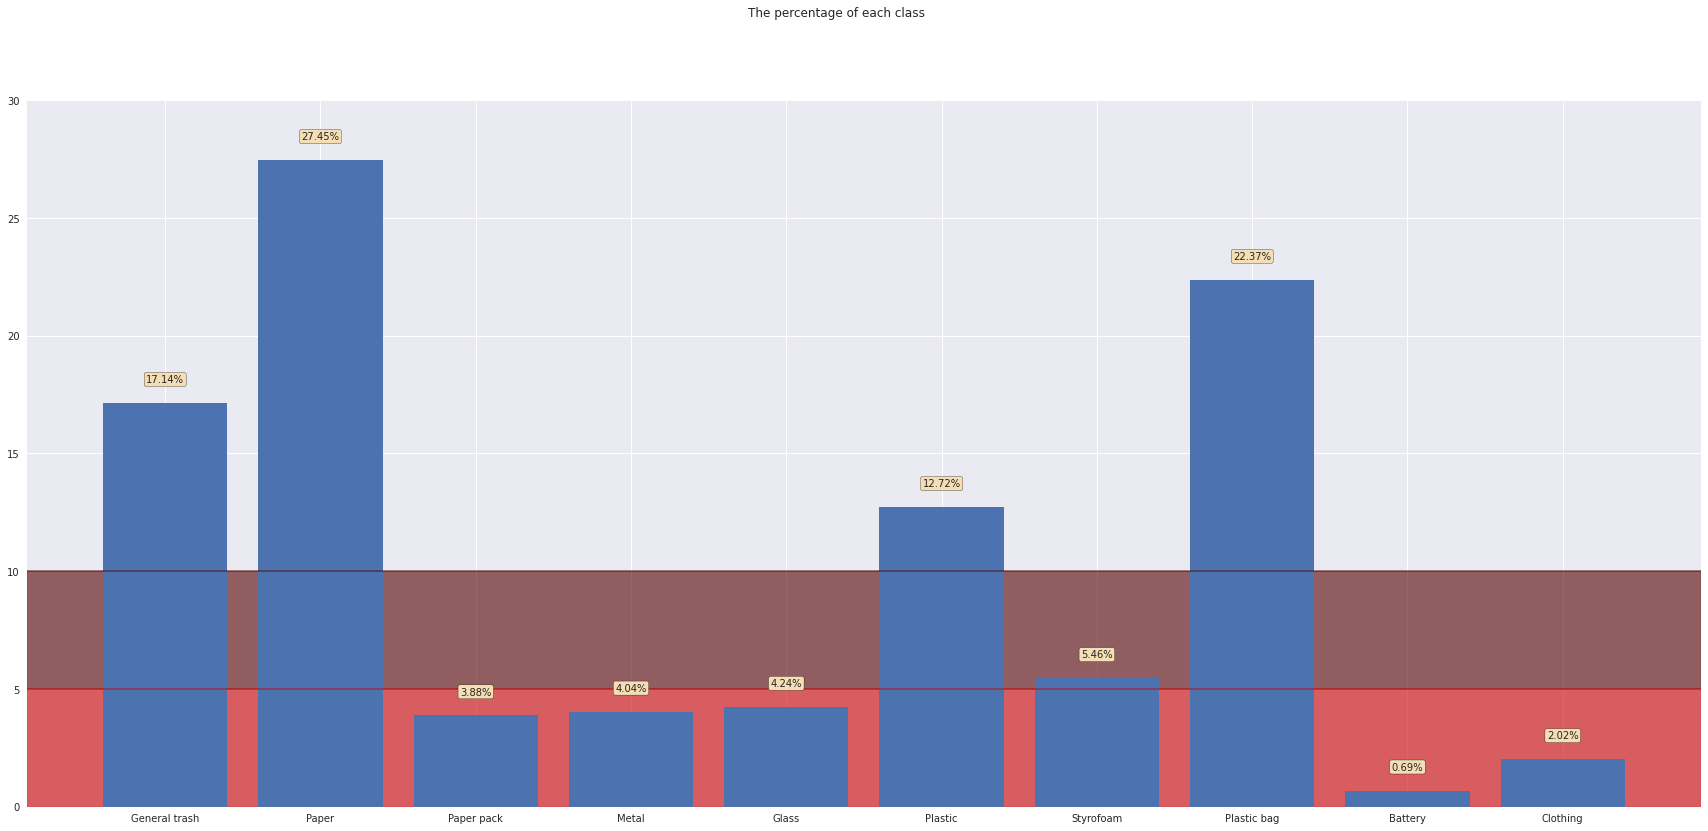

In [7]:
total = 0
for i in range(len(EDA_matrix)):
    total += sum(EDA_matrix[i])
percentage_EDA = [round(sum(EDA_matrix[i])/total*100,2) for i in range(len(id_list))]
fig, ax = plt.subplots(1,1,figsize=(30,13))
ax.bar(id_list, percentage_EDA, zorder=2)
ax.set_ylim(0,30)
ax.axhline(5,xmin=0,xmax=2, color='#CC0000', alpha=0.5, zorder=3)#Line 쭉 그리기
ax.axhline(10,xmin=0,xmax=2, color='#550000', alpha=0.5, zorder=3)#Line 쭉 그리기
ax.axhspan(0,5,color='#CC0000', alpha=0.6, zorder=1)
ax.axhspan(5,10,color='#550000', alpha=0.6, zorder=1)
bbox = dict(boxstyle='round',fc='wheat',pad=0.2) #bbox 선언
for k in range(len(id_list)):
    ax.text(x=id_list[k],y=percentage_EDA[k]+1,s=f'{percentage_EDA[k]}%',va='center',ha='center',bbox=bbox,zorder=9)
fig.suptitle('The percentage of each class')
plt.show()
fig.savefig('The percentage of each class.png', dpi=100)

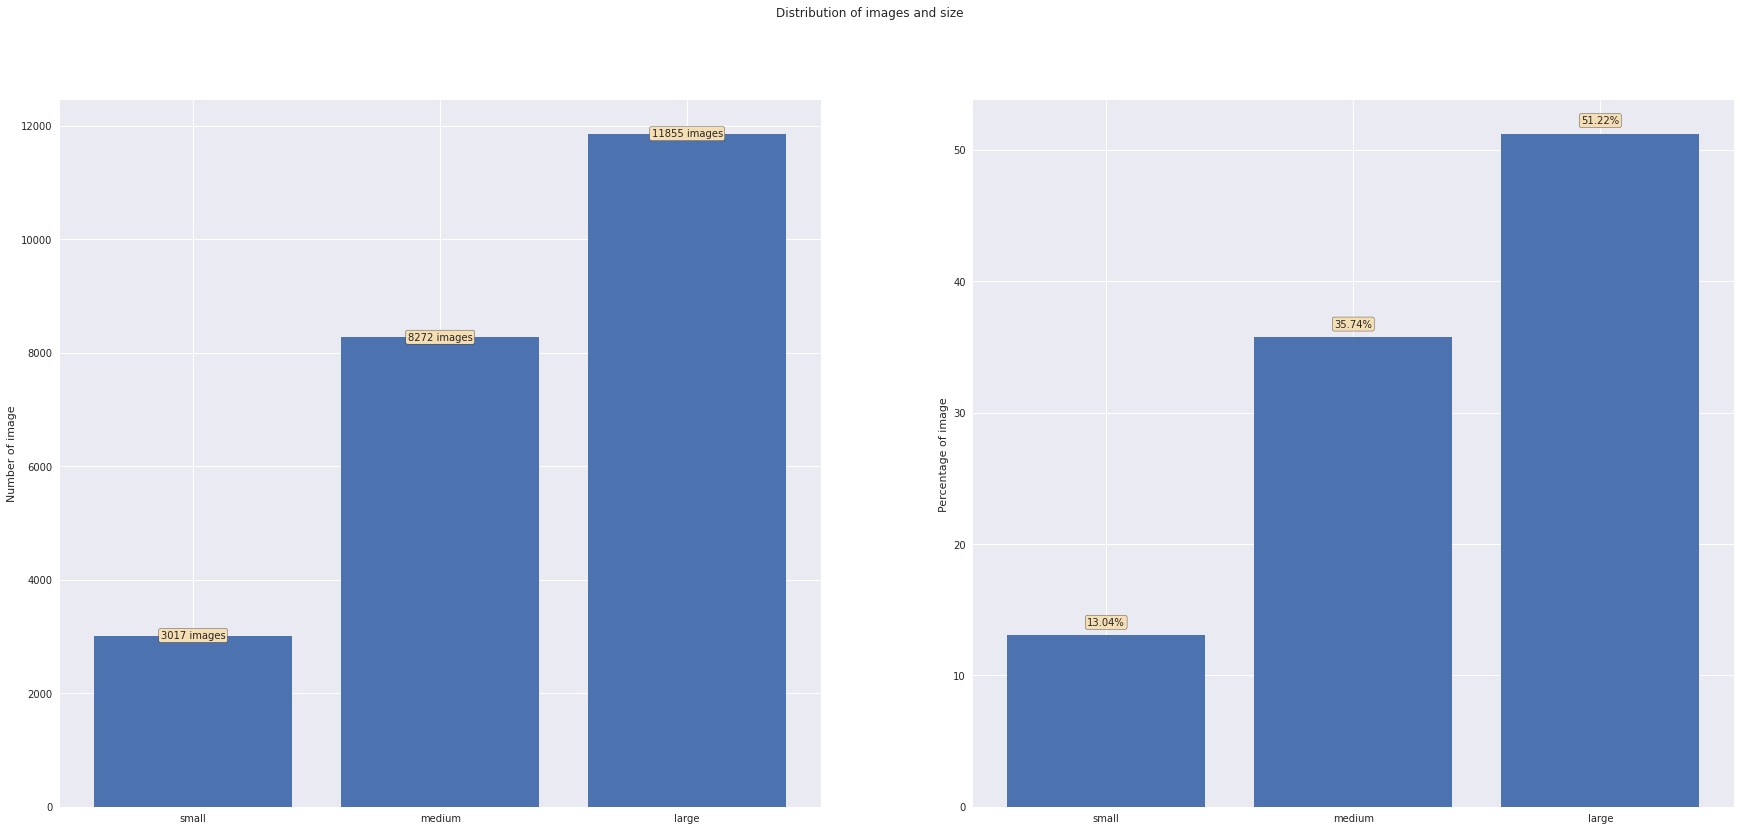

In [8]:
number_size_matrix=[0 for _ in range(3)]
percent_size_matrix=[0 for _ in range(3)]
for y in range(len(EDA_matrix)):
    for x in range(3):
        number_size_matrix[x] += EDA_matrix[y][x]
for x in range(3):
    percent_size_matrix[x] = round(number_size_matrix[x] / sum(number_size_matrix)*100,2)
fig, ax = plt.subplots(1,2,figsize=(30,13))
bbox = dict(boxstyle='round',fc='wheat',pad=0.2) #bbox 선언
ax[0].bar(size_list,number_size_matrix,zorder=3)
ax[0].set_ylabel("Number of image")
for k in range(len(size_list)):
    ax[0].text(x=size_list[k],y=number_size_matrix[k]+1,s=f'{number_size_matrix[k]} images',va='center',ha='center',bbox=bbox,zorder=9)
ax[1].bar(size_list,percent_size_matrix,zorder=3)
ax[1].set_ylabel("Percentage of image")
for k in range(len(size_list)):
    ax[1].text(x=size_list[k],y=percent_size_matrix[k]+1,s=f'{percent_size_matrix[k]}%',va='center',ha='center',bbox=bbox,zorder=9)
fig.suptitle("Distribution of images and size")
plt.show()
fig.savefig('Distribution of images and size.png', dpi=100)

In [9]:
def my_normalizer(array):
    norm_array = (array-np.min(array))/(np.max(array)-np.min(array))
    return norm_array
def my_z_normalizer(array):
    z_norm_array = np.exp(-(array-np.mean(array))**2/(np.std(array)**2))/((np.std(array)*np.sqrt(2*np.pi)))
    return my_normalizer(z_norm_array)

In [10]:
zero_map = np.array([[0 for y in range(1024)] for x in range(1024)])
energy_map = np.array([[0 for y in range(1024)] for x in range(1024)])
point_map = np.array([[0 for y in range(1024)] for x in range(1024)])

for i in range(len(train_json["annotations"])): #'bbox': [0.0, 407.4, 57.6, 180.6]
    xmin, ymin, width, height = train_json["annotations"][i]['bbox']
    energy_map[int(ymin):int(ymin+height),int(xmin):int(xmin+width)] += 1
    point_map[int((int(ymin)+int(ymin+height))/2),int((int(xmin)+int(xmin+width))/2)] += 1
np.savetxt('energy_map.txt',energy_map)
np.savetxt('point_map.txt',point_map)    
norm_energy_map=np.exp(-(energy_map-np.mean(energy_map))**2/(np.std(energy_map)**2))/((np.std(energy_map)*np.sqrt(2*np.pi)))
norm_point_map=np.exp(-(point_map-np.mean(point_map))**2/(np.std(point_map)**2))/((np.std(point_map)*np.sqrt(2*np.pi)))

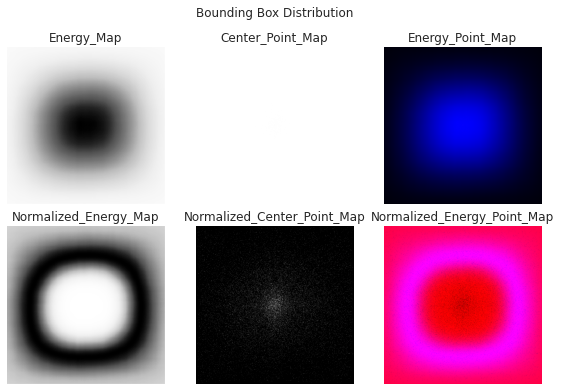

In [11]:
plt.subplot(2,3,1)
plt.imshow(energy_map/np.max(energy_map))
plt.xticks([])
plt.yticks([])
plt.title("Energy_Map")

plt.subplot(2,3,2)
plt.imshow(point_map/np.max(point_map))
plt.xticks([])
plt.yticks([])
plt.title("Center_Point_Map")

plt.subplot(2,3,3)
plt.imshow(np.stack((point_map/np.max(point_map),zero_map,energy_map/np.max(energy_map)),2))
plt.xticks([])
plt.yticks([])
plt.title("Energy_Point_Map")

plt.subplot(2,3,4)
plt.imshow(norm_energy_map)
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Energy_Map")

plt.subplot(2,3,5)
plt.imshow(norm_point_map)
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Center_Point_Map")

plt.subplot(2,3,6)
plt.imshow(np.stack((norm_point_map/np.max(norm_point_map),zero_map,norm_energy_map/np.max(norm_energy_map)),2))
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Energy_Point_Map")

plt.suptitle("Bounding Box Distribution")
plt.tight_layout()
plt.savefig("PEmap.png",dpi=300)

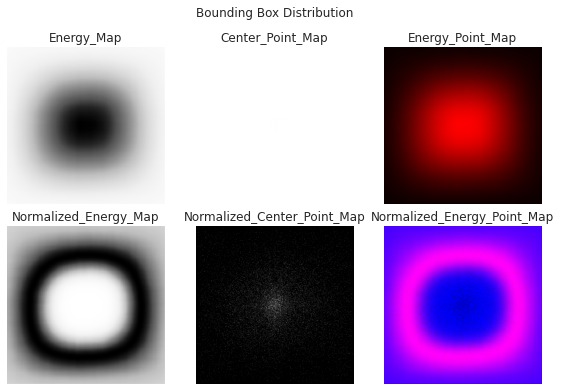

In [12]:
plt.subplot(2,3,1)
plt.imshow(my_normalizer(energy_map))
plt.xticks([])
plt.yticks([])
plt.title("Energy_Map")

plt.subplot(2,3,2)
plt.imshow(my_normalizer(point_map))
plt.xticks([])
plt.yticks([])
plt.title("Center_Point_Map")

plt.subplot(2,3,3)
plt.imshow(np.stack((my_normalizer(energy_map),zero_map,my_normalizer(point_map)),2))
plt.xticks([])
plt.yticks([])
plt.title("Energy_Point_Map")

plt.subplot(2,3,4)
plt.imshow(my_z_normalizer(energy_map))
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Energy_Map")

plt.subplot(2,3,5)
plt.imshow(my_z_normalizer(point_map))
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Center_Point_Map")

plt.subplot(2,3,6)
plt.imshow(np.stack((my_z_normalizer(energy_map),zero_map,my_z_normalizer(point_map)),2))
plt.xticks([])
plt.yticks([])
plt.title("Normalized_Energy_Point_Map")

plt.suptitle("Bounding Box Distribution")
plt.tight_layout()
plt.savefig("PEmap.png",dpi=300)

In [140]:
#id_list
#size_list = ['small','medium','large']
zero_map = np.array([[0 for y in range(1024)] for x in range(1024)])
energy_map3 = np.array([[[0 for y in range(1024)] for x in range(1024)] for z in range(len(id_list))])
point_map3 = np.array([[[0 for y in range(1024)] for x in range(1024)] for z in range(len(id_list))])

for i in range(len(train_json["annotations"])): #'bbox': [0.0, 407.4, 57.6, 180.6]
    xmin, ymin, width, height = train_json["annotations"][i]['bbox']
    energy_map3[train_json["annotations"][i]['category_id'],int(ymin):int(ymin+height),int(xmin):int(xmin+width)] += 1
    point_map3[train_json["annotations"][i]['category_id'],int((int(ymin)+int(ymin+height))/2),int((int(xmin)+int(xmin+width))/2)] += 1
for i in range(len(id_list)):
    np.savetxt(f'energy_map_class{i}.txt',energy_map3[i])
    np.savetxt(f'point_map_class{i}.txt',point_map3[i])    